# 6. 선형회귀를 이용한 예측 프로그램

In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sb
import math
tf.compat.v1.disable_eager_execution()   # Tensorflow 버전 차이 때문에 생기는 오류 방지

In [3]:
import warnings
warnings.filterwarnings(action = 'ignore')

## 데이터 설정
가게 주인의 근로 시간과 매출액을 데이터 프레임 형태로 표현

In [4]:
sales = [[1, 20000], [2, 36000], [3, 64000], [4, 84000], [5, 100000], [6, 116000], [7, 140000]]

df = pd.DataFrame(sales, columns = ['Hours', 'Sales'])

In [5]:
df

,Hours,Sales
0,1,20000
1,2,36000
2,3,64000
3,4,84000
4,5,100000
5,6,116000
6,7,140000


## 데이터 시각화

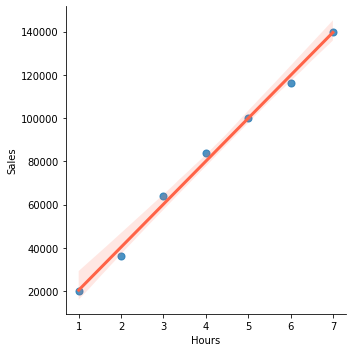

In [6]:
sb.lmplot('Hours', 'Sales', data = df, fit_reg = True, scatter_kws = {"s" : 50}, line_kws = {"lw" : 3, 'color': '#FF6347'})

## 선형 회귀의 개념
* 위의 시각화 결과에서 확인할 수 있듯, 앞서 입력한 근로 시간과 매출액 데이터는 선형적.
* 선형 회귀 모델 구축이란, 주어진 데이터를 학습시켜 가장 합리적인 직선($y = ax + b$)을 찾아내는 것.
* 선형 회귀 모델 구축에는 아무리 적어도 3개 이상의 데이터가 필요.
* 선형 회귀에서의 학습이란 주어진 데이터를 이용해 일차함수를 합리적으로 다듬어 나가는 것.

## 비용함수
> $(비용함수) = (예측 값 - 실제 값)^2$
* 1회 학습할 때마다 각 데이터의 비용함수를 구하여 이를 평균냄.
* 학습을 많이 반복하여 각 데이터의 비용함수 평균을 줄여나가는 방향으로 일차함수를 수정해 합리적인 회귀식 도출.

## 경사하강
> 비용함수 : $C(W) = ((Wx + b) - y)^2$   
* 극솟값, 즉 비용함수가 최솟값인 점이 목표 지점.
* 학습을 시작할 때 임의의 W값을 잡고(난수 생성 함수 이용) 학습 시작.
* 학습을 진행하며 목표 지점에 가까워지도록 W의 값을 수정해나감.
* W값을 같은 폭으로 수정한다 하더라도, 극솟값에 가까워질수록 비용함수의 변화량이 작음.
* 극솟값에 가까워질수록 미분계수가 작아지기 때문.
* 즉, 이차곡선의 특성상 초반에 많은 폭으로 변화함.
* 텐서플로우는 경사하강 라이브러리를 제공.
* 어느 정도 폭으로 수정할 지(Learning Rate)를 결정하는 것도 중요한 문제.

## 학습률(Learning Rate)
> $W_n = W_{n-1} - a \times C'(W_{n-1})$
* 위 수식에서 a가 학습률.
* 학습률은 불변이지만, 학습이 진행될수록 비용함수의 값이 점점 작아지므로 $\Delta W$의 값도 점점 작아짐.

## 학습
선형 데이터들을 잇는 $H(x) = Wx + b$ 꼴의 일차식의 일차계수와 상수항을 찾아내는 과정

In [13]:
# 1차 계수(가중치) 초기값 설정(난수)
W = tf.Variable(tf.random.uniform([1], -100, 100))

# 상수항(y절편) 초기값 설정(난수)
b = tf.Variable(tf.random.uniform([1], -100, 100))

# Placeholder 생성
x = tf.compat.v1.placeholder(dtype = tf.float32)
y = tf.compat.v1.placeholder(dtype = tf.float32)

# 일차식 정의
H = W * x + b

# 비용함수 정의(예측치와 실제값의 차를 제곱한 값의 평균)
cost = tf.reduce_mean(tf.square(H - y))

# 학습률 결정
learning_rate = tf.Variable(0.01)

# 경사하강 라이브러리 이용
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)

# 비용함수를 최소화하는 방향으로 학습하도록 설정
train = optimizer.minimize(cost)

# 변수 초기화용 객체 생성
init = tf.compat.v1.global_variables_initializer()

# Session 객체 생성
sess = tf.compat.v1.Session()

# 변수를 Tensorflow에 적용할 수 있는 형태로 초기화
sess.run(init)

# 학습 진행(Feeding)
for i in range(5001):
    sess.run(train, feed_dict = {x : df['Hours'], y : df['Sales']})
    if i % 50 == 0:
        print(sess.run(W))

[8037.0312]
[19304.629]
[19401.428]
[19481.266]
[19547.117]
[19601.43]
[19646.229]
[19683.18]
[19713.658]
[19738.795]
[19759.53]
[19776.63]
[19790.736]
[19802.37]
[19811.965]
[19819.88]
[19826.408]
[19831.791]
[19836.232]
[19839.896]
[19842.916]
[19845.408]
[19847.465]
[19849.16]
[19850.557]
[19851.713]
[19852.662]
[19853.447]
[19854.094]
[19854.627]
[19855.068]
[19855.432]
[19855.732]
[19855.979]
[19856.184]
[19856.352]
[19856.49]
[19856.602]
[19856.7]
[19856.777]
[19856.842]
[19856.895]
[19856.938]
[19856.973]
[19857.002]
[19857.025]
[19857.047]
[19857.062]
[19857.074]
[19857.086]
[19857.096]
[19857.102]
[19857.11]
[19857.113]
[19857.117]
[19857.121]
[19857.123]
[19857.125]
[19857.127]
[19857.127]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[19857.13]
[1985

## 결과 출력

In [9]:
# 실행 결과로 반환되는 객체에서 숫자 추출
result = 0; weight = 0; bias = 0
for i in sess.run(H, feed_dict = {x : [20]}):
    result = i
for i in sess.run(W):
    weight = i
for i in sess.run(b):
    bias = i

# 예측결과와 회귀식 출력
print("예측결과 :", end = ' '); print(result)
print("H(x) =", end = ' '); print(weight, end = ' ')
print("* x +", end = ' '); print(bias)

예측결과 : 397714.1
H(x) = 19857.13 * x + 571.4775
